### 목표 : 생선 품종 분류 모델
1) 데이터 : fish.csv
2) 피쳐   : Weight, Length
3) 타겟   : Species
4) 기계학습: 지도학습 + 분류 (도미, 빙어 분류는 이진 분류)

In [34]:
# 0. 모듈 로딩, 데이터 준비
import pandas as pd
import matplotlib.pyplot as plt

data_file = 'DATA/fish.csv'
fishDF = pd.read_csv(data_file)
fishDF

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [3]:
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [4]:
# 필요한 열만 가져오기
fishDF = pd.read_csv(data_file, usecols=['Species', 'Weight', 'Length'])
fishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [5]:
# 1. 데이터 전처리
fishDF.isna().sum() # 결측치 : 0
fishDF.duplicated().sum()   # 중복데이터 : 4

4

In [49]:
# 2. 'Bream', 'Smelt' 행만 뽑아오기
fishDF = fishDF[fishDF['Species'].isin(['Bream', 'Smelt'])]

# mask 사용
mask = fishDF.Species.isin(['Bream', 'Smelt'])
twofishDF = fishDF[mask]
twofishDF.info()

# reset index
twofishDF = twofishDF.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   49 non-null     object 
 1   Weight    49 non-null     float64
 2   Length    49 non-null     float64
 3   Diagonal  49 non-null     float64
 4   Height    49 non-null     float64
 5   Width     49 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.7+ KB


In [50]:
# 3. 학습용 데이터 준비 : 피처와 타겟을 분리
feature = twofishDF[['Weight', 'Length']]
feature.head()

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0


In [51]:
target = twofishDF['Species']
target.head()
# bool 로 변환 : bream = 0, smelt = 1
target.replace(['Bream', 'Smelt'], [0, 1], inplace=True)

twofishDF.head(), twofishDF.tail()

(   Species  Weight  Length  Diagonal   Height   Width
 0        0   242.0    25.4      30.0  11.5200  4.0200
 1        0   290.0    26.3      31.2  12.4800  4.3056
 2        0   340.0    26.5      31.1  12.3778  4.6961
 3        0   363.0    29.0      33.5  12.7300  4.4555
 4        0   430.0    29.0      34.0  12.4440  5.1340,
     Species  Weight  Length  Diagonal  Height   Width
 44        1    12.2    12.2      13.4  2.0904  1.3936
 45        1    13.4    12.4      13.5  2.4300  1.2690
 46        1    12.2    13.0      13.8  2.2770  1.2558
 47        1    19.7    14.3      15.2  2.8728  2.0672
 48        1    19.9    15.0      16.2  2.9322  1.8792)

In [52]:
# 4. 모델 학습
#   - 알고리즘 구현 인스턴스 생성 -> 지도학습 -분류 알고리즘 중 선택 : KNN
#   - 학습 진행 메서드 => fit()
from sklearn.neighbors import KNeighborsClassifier

# 4-1. KNN 인스턴스 생성
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [53]:
# 4-2. 학습 진행
# - .fit( feature, label )
model.fit(feature, target)

KNeighborsClassifier()

In [54]:
# 학습 후 속성 확인
print('classes_ :', model.classes_)
print('feature_names_in_ :', model.feature_names_in_)
print('n_features_in_ :', model.n_features_in_)

classes_ : [0 1]
feature_names_in_ : ['Weight' 'Length']
n_features_in_ : 2


In [55]:
# 5. 학습 후 테스트 -> 메서드 : score()
# - 결과값 : 0.0 ~ 1.0 (100%)
# - 사용 데이터 : 학습에 사용되지 않은 데이터 
model.score(feature, target)

1.0

In [89]:
# 6. 예측: 서비스에 모델 활용 시 사용 
# - 메서드 : predict(), predict_proba()
# - 조건 : 학습 시 전달된 데이터와 동일한 형태의 데이터 전달
# [ 무게, 길이 ]
new_data = pd.DataFrame([[21.8, 17]], columns=['Weight', 'Length'])

# 학습 시 제공된 데이터와 동일한 형태로 제공
pred_y = model.predict(new_data)

pred_y  # : 1

array([1], dtype=int64)

In [57]:
# 예측 확률
model.predict_proba(new_data)

array([[0., 1.]])

In [70]:
# 데이터와 최근접 이웃 데이터
dis, idx = model.kneighbors(new_data)
model.kneighbors(new_data)
# 여기서 출력된 5개의 점이 new_data와 가장 가까운 점
# 반환 : 거리, 원소 번호
#        여기서 원소 번호는 인덱스
#        처리 중 np.array로 정렬하기 때문

(array([[ 2.75862284,  3.42052628,  9.57705592, 10.4       , 10.73312629]]),
 array([[48, 47, 45, 46, 44]], dtype=int64))

In [71]:
feature.index, feature.shape

(RangeIndex(start=0, stop=49, step=1), (49, 2))

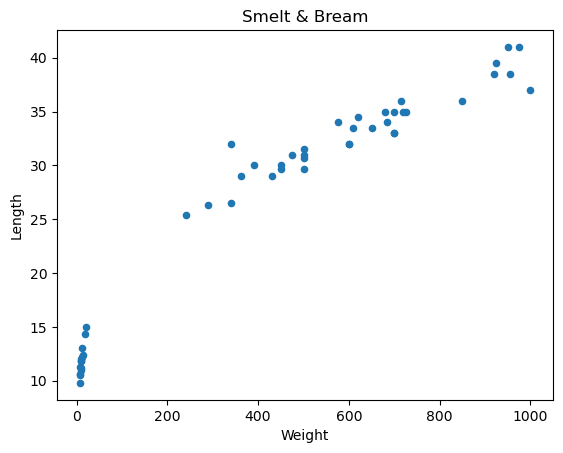

In [72]:
## [확인] Weight & Length 시각화
# pandas의 Series, DataFrame의 plot() 매서드
colormap = ['Orange', 'blue']
feature.plot.scatter(x='Weight', y='Length', title='Smelt & Bream') # , colormap=colormap)

plt.show()

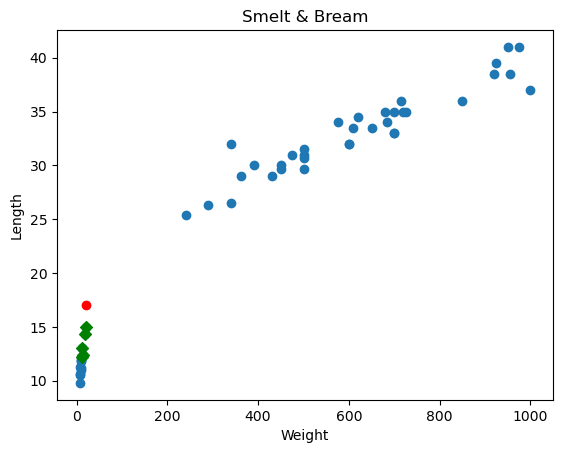

In [91]:
# 전체 그래프 구조 설정
feature.plot.scatter(x='Weight', y='Length', title='Smelt & Bream')

# 데이터 scatter 그리기
plt.scatter(x=feature.Weight, y=feature.Length)

# ㅐㅅ로운 데이터 시각화
plt.plot(new_data.Weight, new_data.Length, 'ro')

# 새로운 데이터의 k개 최근접 이웃 데이터 시각화
xs = feature.iloc[idx[0]].Weight
ys = feature.iloc[idx[0]].Length

plt.scatter(x=xs, y=ys, marker='D', color='g')

plt.show()

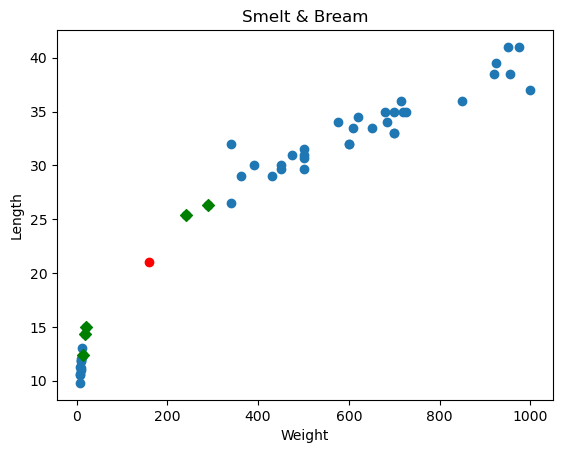

In [94]:
# 새로운 new_data 넣어보기
new_data = pd.DataFrame([[160, 21]], columns=['Weight', 'Length'])
dis, idx = model.kneighbors(new_data)

# 전체 그래프 구조 설정
feature.plot.scatter(x='Weight', y='Length', title='Smelt & Bream')

# 데이터 scatter 그리기
plt.scatter(x=feature.Weight, y=feature.Length)

# ㅐㅅ로운 데이터 시각화
plt.plot(new_data.Weight, new_data.Length, 'ro')

# 새로운 데이터의 k개 최근접 이웃 데이터 시각화
xs = feature.iloc[idx[0]].Weight
ys = feature.iloc[idx[0]].Length

plt.scatter(x=xs, y=ys, marker='D', color='g')

plt.show()